# Variáveis Categóricas

Vamos usar o pacote `feature-engine`. Esse pacote é citado na lista de [related projects](https://scikit-learn.org/dev/related_projects.html) do `scikit-learn`.

A lib possui muitas técnicas de feature engineering, facilmente aplicáveis dentro de um pipeline.

Caso o pacote ainda não esteja instalado, por favor instale-o descomentando a linha abaixo e executando o código.

In [ ]:
!pip install feature_engine==1.0.2

## One-Hot Encoding (Dummy Variables)

Cria uma nova coluna booleana para cada valor da variável categórica. A variável booleana será 1 se naquela linha havia uma categoria referenciada pela coluna e 0 caso contrário.

Vantagens:
1. Não faz suposições a respeito de como as categorias estão distribuídas
2. Retém toda as informações da variável categórica

Desvantagens:
1. Aumenta o número de colunas
2. Não adiciona informação nova.

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'id': [123, 232, 312, 431, 521],
    'cor': ['verde', 'vermelho', 'vermelho', 'azul', 'verde'],
})

In [ ]:
df

,id,cor
0,123,verde
1,232,vermelho
2,312,vermelho
3,431,azul
4,521,verde


In [ ]:
from feature_engine.encoding import OneHotEncoder
ohe = OneHotEncoder(variables=['cor'])
ohe.fit(df)
ohe.transform(df)

,id,cor_verde,cor_vermelho,cor_azul
0,123,1,0,0
1,232,0,1,0
2,312,0,1,0
3,431,0,0,1
4,521,1,0,0


## Label Encoding

Substitui cada uma das categorias por um valor inteiro.

Vantagens:
1. Facilidade de implementação e entendimento.
 
Desvantagens:
2. O algoritmo pode aprender relações de ordinalidade que não existem, como pensar que `Ceará` é maior que `Recife`, caso o valor da categoria `Ceará` seja 2 e da categoria `Recife` seja 1.

Esse método de `Label Encoding` geralmente é usado apenas para rápido benchmarking de algoritmos de machine learning.

In [ ]:
df = pd.DataFrame({
    'id': [123, 232, 312, 431, 521],
    'cidade': ['São Paulo', 'Fortaleza', 'Fortaleza', 'Recife', 'Recife']
})

In [ ]:
df

,id,cidade
0,123,São Paulo
1,232,Fortaleza
2,312,Fortaleza
3,431,Recife
4,521,Recife


In [ ]:
from feature_engine.encoding import OrdinalEncoder
oce = OrdinalEncoder(encoding_method='arbitrary', variables=['cidade'])
oce.fit(df)
oce.transform(df)

,id,cidade
0,123,0
1,232,1
2,312,1
3,431,2
4,521,2


## Mean Target Encoding

Substitui a categoria pelo valor médio da variável target naquela categoria.

Vantagens:
1. Traz uma informação nova ao decodificar a variável. Categorias que possuem valor médio da target maior, receberam um número maior.
2. Não aumenta o número de variáveis.

Desvantagens:
1. Pode levar ao overffitting
2. Duas categorias com o mesmo valor médio da target, podem ser substituída pelo mesmo valor. Isso pode levar a perda de informação.

In [ ]:
df = pd.DataFrame({
    'uf': ['RS', 'SP', 'SP', 'SP', 'SP', 'SP', 'MG', 'GO', 'SP', 'SP'],
    'target': [0, 0, 1, 1, 1, 0, 0, 0, 0, 1]
})

df

,uf,target
0,RS,0
1,SP,0
2,SP,1
3,SP,1
4,SP,1
5,SP,0
6,MG,0
7,GO,0
8,SP,0
9,SP,1


In [ ]:
from feature_engine.encoding import MeanEncoder

X_train = df[['uf']]
y_train = df.target

mean_encoder = MeanEncoder(variables=['uf'])
mean_encoder.fit(X_train, y_train)
mean_encoder.transform(X_train)

,uf
0,0.000000
1,0.571429
2,0.571429
3,0.571429
4,0.571429
5,0.571429
6,0.000000
7,0.000000
8,0.571429
9,0.571429


## Count-Frequency Encoder

Substitui a categoria pela frequência em que aparece.

Vantagens:
1. Inclui uma nova informação.
2. Não aumenta o número de variáveis.

Desvantagens:
1. Duas categorias com a mesma frequência podem ser substituída pelo mesmo valor. Isso pode levar a perda de informação.

In [ ]:
df = pd.DataFrame({
    'uf': ['RS', 'SP', 'RS', 'SP', 'SP', 'SP', 'MG', 'GO', 'SP', 'SP'],
})

df

,uf
0,RS
1,SP
2,RS
3,SP
4,SP
5,SP
6,MG
7,GO
8,SP
9,SP


In [ ]:
from feature_engine.encoding import CountFrequencyEncoder

count_frequency_encoder = CountFrequencyEncoder(variables=['uf'], 
                                                encoding_method='frequency')
count_frequency_encoder.fit(df)
count_frequency_encoder.transform(df)

,uf
0,0.2
1,0.6
2,0.2
3,0.6
4,0.6
5,0.6
6,0.1
7,0.1
8,0.6
9,0.6


# Variáveis Numéricas

# Feature Scaling

Feature Scaling é uma feature engineering muito importante para vários modelos de machine learning. Ela pode afetar os parâmetros que esses modelos aprendem, variáveis com magnitudes maiores que as outras podem dominar e alguns algoritmos de otimização, como o gradiente descendente, que estão por trás de muitas implementações, convergem rapidamente e para o mínimo global quando as variáveis estão em escalas parecidas.

Algoritmos de Machine Learning que precisam de Feature Scaling:

1. Regressão Linear
2. Regressão Logística
3. Support Vector Machines
4. KNN
5. K-Means 
6. PCA
7. Redes Neurais

Algoritmos de Machine Learning que não precisam de Feature Scaling:

1. Árvores de Decisão
2. Random Forest
3. Gradient Boosting

No geral, algoritmos baseados em árvores não necessitam de feature scaling.

## Standardisation

Faz com que a distribuição da variável fique normal, com média igual a 0 e desvio-padrão igual a 1.

$$ X^{'}= \frac{X-mean(X)}{std(X)}$$

In [ ]:
df = pd.DataFrame({
    'valores': [10, 20, 30, 40, 50, 60],
})
df

,valores
0,10
1,20
2,30
3,40
4,50
5,60


In [ ]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler

std_scaler = SklearnTransformerWrapper(transformer = StandardScaler(),
                                       variables = ['valores'])

std_scaler.fit(df)
std_scaler.transform(df)

,valores
0,-1.46385
1,-0.87831
2,-0.29277
3,0.29277
4,0.87831
5,1.46385


In [ ]:
# Calculando manualmente
(10 - df.values.mean()) / df.values.std()

-1.4638501094227996

## Min-Max Scaler

Deixa as variáveis com distribuição no range [0,1]. Ou seja, o valor mínimo da variável será 0 e o valor máximo será 1.

$$ X^{'}= \frac{X-X_{min}}{X_{max}-X_{min}}$$

In [ ]:
df

,valores
0,10
1,20
2,30
3,40
4,50
5,60


In [ ]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = SklearnTransformerWrapper(transformer = MinMaxScaler(),
                                          variables = ['valores'])

minmax_scaler.fit(df)
minmax_scaler.transform(df)

,valores
0,0.0
1,0.2
2,0.4
3,0.6
4,0.8
5,1.0


# Outlier Engineering

Um outlier é um ponto que se diferencia muito dos pontos restantes.

Formas de pré-processar outliers:

1. Remoção dos outliers da base
2. Substituição dos valores outliers

Algoritmos lineares, como regressão logística e regressão linear, podem sofrer em termos de performance devido a presença de outliers.
Algoritmos baseados em árvores são robustos a outliers. Não precisa de tratamento de outliers para esses algoritmos.

## Remoção de Outlier de acordo com o Interquantile Range.

$$IQR = 75^{th} - 25^{th}$$

* Limite Superior: $$75^{th} + IQR \times 3$$
* Limite Inferior: $$25^{th} - IQR \times 3$$

In [ ]:
df = pd.DataFrame({
    'valores': [10, 20, 30, 40, 100, 101, 102, 103, 104, 105, 500]
})
df

,valores
0,10
1,20
2,30
3,40
4,100
5,101
6,102
7,103
8,104
9,105


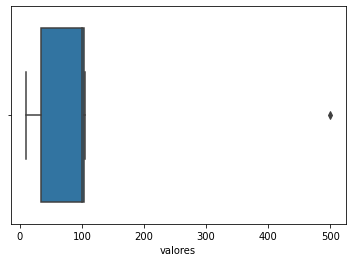

In [ ]:
import seaborn as sns
sns.boxplot(data=df, x='valores')

In [ ]:
from feature_engine.outliers import OutlierTrimmer

outlier_trimmer = OutlierTrimmer(capping_method='iqr', 
                                 fold=3, 
                                 variables=['valores'])
outlier_trimmer.fit(df)
outlier_trimmer.transform(df)

,valores
0,10
1,20
2,30
3,40
4,100
5,101
6,102
7,103
8,104
9,105


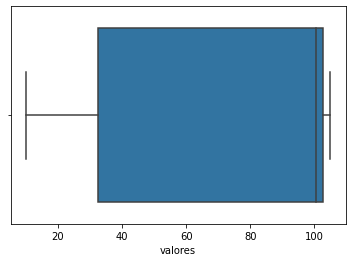

In [ ]:
import seaborn as sns
sns.boxplot(data=outlier_trimmer.transform(df), x='valores')